In [49]:
import pandas as pd
import numpy as np

In [6]:
covid_data=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

In [18]:
covid_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
293,W.P. Kuala Lumpur,Malaysia,2020-03-17T11:53:10,0,0,0,3.1390,101.6869
294,W.P. Labuan,Malaysia,2020-03-17T11:53:10,0,0,0,5.2831,115.2308
295,W.P. Putrajaya,Malaysia,2020-03-17T11:53:10,0,0,0,2.9264,101.6964
296,Unknown,Malaysia,2020-03-17T11:53:10,0,0,0,NaN,NaN


In [109]:
covid_data.info()
covid_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  145 non-null    object 
 1   Country/Region  298 non-null    object 
 2   Last Update     298 non-null    object 
 3   Confirmed       298 non-null    int64  
 4   Deaths          298 non-null    int64  
 5   Recovered       298 non-null    int64  
 6   Latitude        296 non-null    float64
 7   Longitude       296 non-null    float64
 8   Active          298 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 21.1+ KB


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166
5,NaN,"Korea, South",2020-03-17T10:33:03,8320,81,1407,35.9078,127.7669,6832
6,France,France,2020-03-17T19:13:08,7652,148,12,46.2276,2.2137,7492
7,NaN,Switzerland,2020-03-17T16:33:04,2700,40,4,46.8182,8.2275,2656
8,United Kingdom,United Kingdom,2020-03-17T15:13:09,1950,55,52,55.3781,-3.4360,1843
9,New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481,1693


In [20]:
covid_data.isnull().sum()

Province/State    153
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            2
Longitude           2
dtype: int64

In [28]:
covid_data.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,298.000000,298.000000,298.000000,296.000000,296.000000
mean,659.734899,26.604027,271.083893,25.153355,8.490652
std,4536.888040,239.488493,3264.650877,23.060677,83.445868
min,0.000000,0.000000,0.000000,-41.454500,-175.198200
25%,3.000000,0.000000,0.000000,9.129250,-71.516375
50%,28.500000,0.000000,0.000000,31.742200,13.471400
75%,139.000000,1.000000,3.000000,42.050050,97.047900
max,67799.000000,3111.000000,56003.000000,71.706900,174.886000


In [29]:
some_cols=covid_data[['Confirmed','Deaths','Recovered']]

In [30]:
some_cols

,Confirmed,Deaths,Recovered
0,67799,3111,56003
1,31506,2503,2941
2,16169,988,5389
3,11748,533,1028
4,9257,24,67
...,...,...,...
293,0,0,0
294,0,0,0
295,0,0,0
296,0,0,0


In [15]:
covid_data['Active']=covid_data['Confirmed']-covid_data['Deaths']-covid_data['Recovered']

In [17]:
covid_data[['Active']]

,Active
0,8685
1,26062
2,9792
3,10187
4,9166
...,...
293,0
294,0
295,0
296,0


In [18]:
covid_data.groupby('Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum()

,Confirmed,Active,Deaths,Recovered
Country/Region,,,,
Afghanistan,26,25,0,1
Albania,55,54,1,0
Algeria,60,44,4,12
Andorra,39,38,0,1
Antigua and Barbuda,1,1,0,0
...,...,...,...,...
Uruguay,29,29,0,0
Uzbekistan,10,10,0,0
Venezuela,33,33,0,0


In [19]:
covid_data.groupby(['Country/Region', 'Province/State'])[['Confirmed','Recovered']].sum()

Confirmed  Recovered
Country/Region Province/State                                    
Australia      Australian Capital Territory          2          0
               From Diamond Princess                 0          0
               New South Wales                     210          4
               Northern Territory                    1          0
               Queensland                           78          8
...                                                ...        ...
US             Wyoming                              11          0
United Kingdom Cayman Islands                        1          0
               Channel Islands                       6          0
               Gibraltar                             3          1
               United Kingdom                     1950         52

[145 rows x 2 columns]

In [20]:
covid_data[covid_data['Country/Region']=='China'][['Province/State','Confirmed','Deaths','Recovered']]

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67799,3111,56003
12,Guangdong,1364,8,1307
14,Henan,1273,22,1250
16,Zhejiang,1232,1,1216
19,Hunan,1018,4,1014
20,Anhui,990,6,984
22,Jiangxi,935,1,934
24,Shandong,761,7,746
27,Jiangsu,631,0,631
28,Chongqing,576,6,570


In [21]:
covid_data.groupby('Country/Region')[['Deaths']].sum().sort_values(['Deaths'], ascending=False)

,Deaths
Country/Region,
China,3230
Italy,2503
Iran,988
Spain,533
France,148
...,...
Guadeloupe,0
Greenland,0
Ghana,0


In [22]:
covid_data[covid_data['Recovered']==0][['Country/Region', 'Recovered', 'Confirmed']]

,Country/Region,Recovered,Confirmed
9,US,0,1706
42,Slovenia,0,275
52,Iceland,0,220
54,US,0,216
56,Chile,0,201
...,...,...,...
293,Malaysia,0,0
294,Malaysia,0,0
295,Malaysia,0,0
296,Malaysia,0,0


In [23]:
covid_data[(covid_data['Confirmed'])==(covid_data['Deaths'])].sort_values(['Confirmed'],ascending=False).head(2)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
261,NaN,Sudan,2020-03-14T01:13:32,1,1,0,12.8628,30.2176,0
268,Cayman Islands,United Kingdom,2020-03-16T14:53:04,1,1,0,19.3133,-81.2546,0


In [24]:
covid_data[(covid_data['Confirmed'])==(covid_data['Recovered'])]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
27,Jiangsu,China,2020-03-15T01:53:02,631,0,631,32.9711,119.4550,0
77,Shanxi,China,2020-03-13T11:09:03,133,0,133,37.5777,112.2922,0
96,Ningxia,China,2020-03-16T14:38:45,75,0,75,37.2692,106.1655,0
170,Qinghai,China,2020-03-11T02:18:14,18,0,18,35.7452,95.9956,0
246,Tibet,China,2020-03-11T02:18:14,1,0,1,31.6927,88.0924,0
258,NaN,Nepal,2020-03-13T22:22:03,1,0,1,28.3949,84.1240,0
269,From Diamond Princess,Australia,2020-03-14T02:33:04,0,0,0,35.4437,139.6380,0
270,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800,0
271,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100,0
272,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000,0


In [25]:
covid_data.groupby('Country/Region')[['Confirmed']].max().sort_values('Confirmed', ascending=False).head()

,Confirmed
Country/Region,
China,67799
Italy,31506
Iran,16169
Spain,11748
Germany,9257


In [26]:
data=covid_data[covid_data['Deaths']>150]

In [110]:
data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187


In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline 

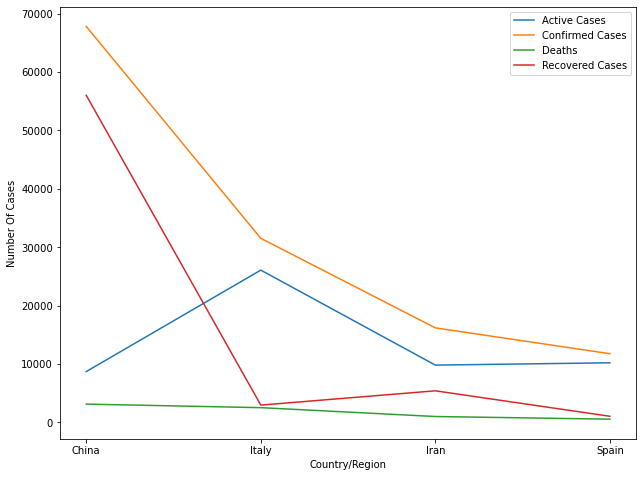

In [29]:
fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])
axes.plot(data['Country/Region'], data['Active'], label='Active Cases')
axes.plot(data['Country/Region'],data['Confirmed'], label='Confirmed Cases')
axes.plot(data['Country/Region'],data['Deaths'], label='Deaths')
axes.plot(data['Country/Region'],data['Recovered'], label='Recovered Cases')

axes.set_xlabel('Country/Region')
axes.set_ylabel('Number Of Cases')
axes.legend()

In [30]:
data1=covid_data[(covid_data['Country/Region']=='US') & (covid_data['Deaths']>0)].reset_index()

In [31]:
data1

,index,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,9,New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481,1693
1,18,Washington,US,2020-03-17T23:33:03,1076,55,1,47.4009,-121.4905,1020
2,25,California,US,2020-03-17T22:53:03,698,12,6,36.1162,-119.6816,680
3,43,New Jersey,US,2020-03-17T20:13:22,267,3,1,40.2989,-74.5210,263
4,54,Florida,US,2020-03-17T23:33:02,216,6,0,27.7663,-81.6868,210
5,58,Louisiana,US,2020-03-17T22:53:03,196,4,0,31.1695,-91.8678,192
6,68,Illinois,US,2020-03-17T22:53:03,161,1,2,40.3495,-88.9861,158
7,69,Colorado,US,2020-03-17T22:53:03,160,2,0,39.0598,-105.3111,158
8,72,Georgia,US,2020-03-17T20:13:22,146,1,0,33.0406,-83.6431,145
9,84,Texas,US,2020-03-17T20:13:22,110,1,0,31.0545,-97.5635,109


<BarContainer object of 18 artists>

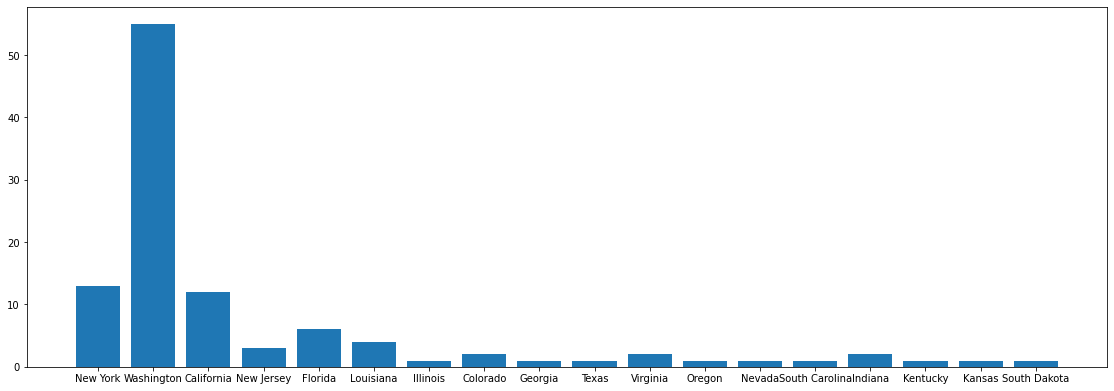

In [32]:
fig=plt.figure(figsize=(15,5))

ax=fig.add_axes([0,0,1,1])
ax.bar(data1['Province/State'], data1['Deaths'])


<BarContainer object of 18 artists>

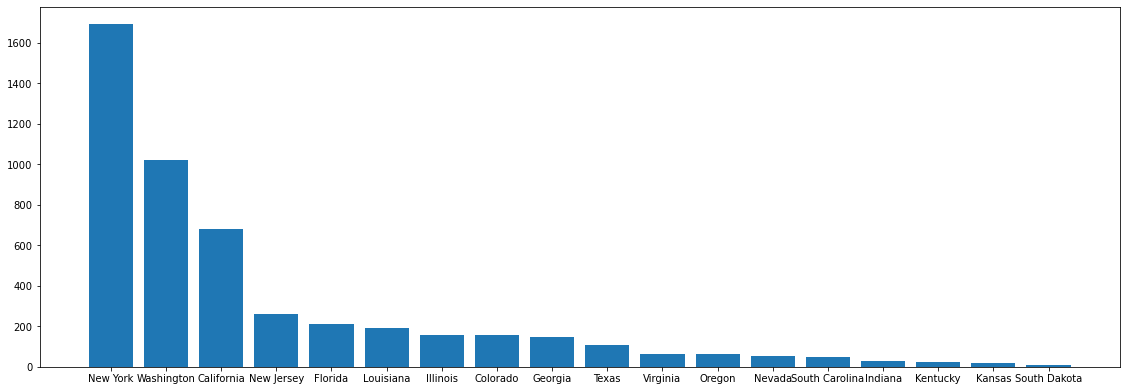

In [35]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_axes([0,0,1,1])
ax1.bar(data1['Province/State'], data1['Active'])

In [71]:
combine_us_data=covid_data[(covid_data['Country/Region']=='US') & (covid_data['Deaths']>0) & (covid_data['Recovered']>0)].drop(['Country/Region','Latitude','Longitude'],axis=1)

In [53]:
combine_us_data=combine_us_data[combine_us_data.sum(axis=1)>0]

In [72]:
combine_us_data=combine_us_data.groupby(['Province/State'])[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
combine_us_data

,Province/State,Confirmed,Active,Deaths,Recovered
0,California,698,680,12,6
1,Illinois,161,158,1,2
2,Kentucky,26,24,1,1
3,New Jersey,267,263,3,1
4,Washington,1076,1020,55,1


<BarContainer object of 5 artists>

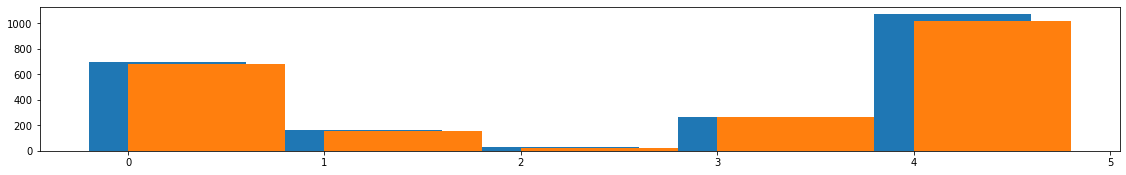

In [78]:
fig=plt.figure(figsize=(15,2))
axess=fig.add_axes([0,0,1,1])

combine_us_data_axis=np.arange(len(combine_us_data['Province/State']))
axess.bar(combine_us_data_axis +0.2, combine_us_data['Confirmed'])
axess.bar(combine_us_data_axis +0.4, combine_us_data['Active'])